## Import Libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Importing data

In [37]:
data=pd.read_csv("drug200.csv")
print(data)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


## Basic Information

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Data Cleaning

## Empty cells

In [39]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

### Check Duplicates

In [40]:
print('Number of duplicated rows: ' , len(data[data.duplicated()]))

Number of duplicated rows:  0


## Plotting Boxplot

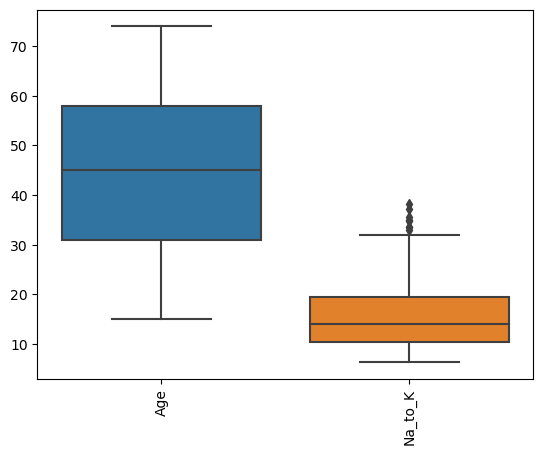

In [41]:
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

## Encoding Categorial Data

In [42]:
categ_col = data.select_dtypes(include=['object']).columns

# Initialize encoders
label_encoder = LabelEncoder()

# Encode each categorical column using Label Encoding for simplicity
encoded_data = data.copy()
for i in categ_col:
    encoded_data[i] = label_encoder.fit_transform(data[i])

# Display the first 5 rows of the encoded dataset
print(encoded_data)

     Age  Sex  BP  Cholesterol  Na_to_K  Drug
0     23    0   0            0   25.355     0
1     47    1   1            0   13.093     3
2     47    1   1            0   10.114     3
3     28    0   2            0    7.798     4
4     61    0   1            0   18.043     0
..   ...  ...  ..          ...      ...   ...
195   56    0   1            0   11.567     3
196   16    1   1            0   12.006     3
197   52    1   2            0    9.894     4
198   23    1   2            1   14.020     4
199   40    0   1            1   11.349     4

[200 rows x 6 columns]


## Extract Dependent and Independent Variables

In [43]:
X = encoded_data.iloc[:,0:5]   #Independent variable
y = encoded_data['Drug']     #dependent variable

## ## Statistical Analysis
### (Correlation,Describe)

In [44]:
print(data.describe())

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


               Age    Sex     BP  Cholesterol  Na_to_K   Drug
Age          1.000  0.102  0.054       -0.068   -0.063  0.042
Sex          0.102  1.000 -0.008       -0.009   -0.125  0.018
BP           0.054 -0.008  1.000       -0.138   -0.149  0.419
Cholesterol -0.068 -0.009 -0.138        1.000    0.010  0.048
Na_to_K     -0.063 -0.125 -0.149        0.010    1.000 -0.689
Drug         0.042  0.018  0.419        0.048   -0.689  1.000


<Axes: >

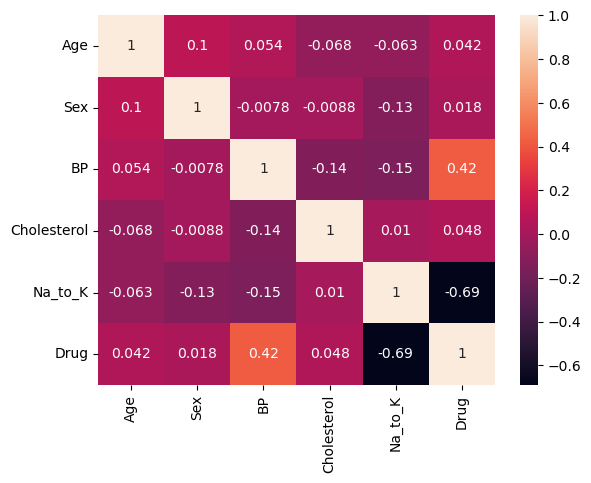

In [45]:
correlation=encoded_data.corr(numeric_only=True)
print(np.around(correlation,decimals=3))
sns.heatmap(correlation,annot=True)

## Split Train and Test Data

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Model

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Fitting the Logistic Regression model to the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Comparing the actual output values for X_test with the predicted values
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(data)

     Actual  Predicted
95        4          4
15        0          0
30        4          4
158       3          4
128       0          0
115       0          0
69        0          0
170       4          4
174       1          1
45        4          4
66        1          1
182       4          4
165       0          0
78        1          0
186       2          2
177       0          0
56        2          2
152       4          4
82        3          4
68        0          0
124       2          2
16        4          4
148       4          4
93        0          0
65        0          0
60        0          0
84        3          4
67        4          4
125       0          0
132       4          4
9         0          0
18        3          4
55        3          0
75        0          0
150       1          1
104       0          0
135       4          4
137       1          0
164       0          0
76        1          0


c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Predicting the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score is ", accuracy * 100, "%")

# Optionally, include detailed performance metrics:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy score is  80.0 %

Confusion Matrix:
[[15  0  0  0  0]
 [ 3  3  0  0  0]
 [ 0  0  3  0  0]
 [ 1  0  0  0  4]
 [ 0  0  0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.50      0.67         6
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         5
           4       0.73      1.00      0.85        11

    accuracy                           0.80        40
   macro avg       0.70      0.70      0.68        40
weighted avg       0.72      0.80      0.74        40



c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

In [50]:
lr = LogisticRegression(max_iter=1000, random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the classifiers
lr.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_predict_lr = lr.predict(X_test)
y_predict_gb = gb.predict(X_test)
y_predict_xgb = xgb.predict(X_test)

# Evaluate the models
score_lr = accuracy_score(y_test, y_predict_lr) * 100
score_gb = accuracy_score(y_test, y_predict_gb) * 100
score_xgb = accuracy_score(y_test, y_predict_xgb) * 100

print(f"Logistic Regression Accuracy: {score_lr:.2f}%")
print(f"Gradient Boosting Classifier Accuracy: {score_gb:.2f}%")
print(f"XGBoost Classifier Accuracy: {score_xgb:.2f}%")

# Additional evaluation reports
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_predict_lr))

print("\nClassification Report for Gradient Boosting Classifier:")
print(classification_report(y_test, y_predict_gb))

print("\nClassification Report for XGBoost Classifier:")
print(classification_report(y_test, y_predict_xgb))


c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 87.50%
Gradient Boosting Classifier Accuracy: 100.00%
XGBoost Classifier Accuracy: 97.50%

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       0.75      1.00      0.86         3
           3       1.00      0.20      0.33         5
           4       0.71      0.91      0.80        11

    accuracy                           0.88        40
   macro avg       0.89      0.82      0.80        40
weighted avg       0.90      0.88      0.85        40


Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4   

c:\Users\HP\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [13:06:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


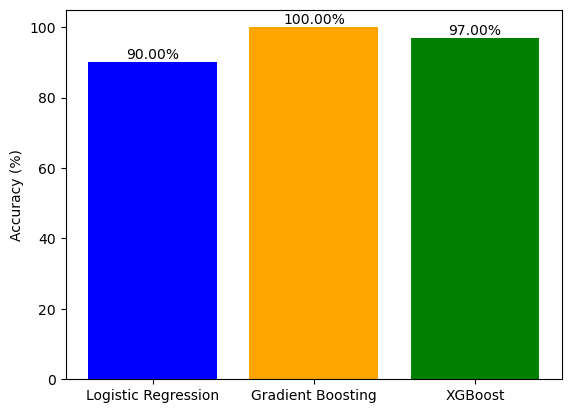

In [51]:
score_lr, score_gb, score_xgb = 90.0, 100, 97.0
models = ['Logistic Regression', 'Gradient Boosting', 'XGBoost']
scores = [score_lr, score_gb, score_xgb]

plt.bar(models, scores, color=['blue', 'orange', 'green'])
plt.ylabel('Accuracy (%)')
for i, score in enumerate(scores):
    plt.text(i, score + 1, f'{score:.2f}%', ha='center')
plt.show()

## From this graph we can says that Gradient Boosting models performs the perfect accuracy score